# Digital Image Filters (in Practice)

## Introduction to Image Processing Using Matlab

_Authors: Mikołaj Leszczuk, Zbigniew Hulicki, Jakub Nawała_

[http://qoe.agh.edu.pl](http://qoe.agh.edu.pl)

## Theoretical Fundamentals

Digital filters are a central part of many signal processing systems. Image filtering is a mathematical operation on pixels of the source image, which results in a new, transformed image being produced. Its primary usage is to extract properties of the input image. Those are usually used in further processing steps. 

We can perform filtration in a spatial domain or the frequency domain. In the first case, a convolution operation between a matrix (called “kernel”) and the input image is applied (for the sake of correctness, we are using a discrete convolution, where both operands have a finite number of points). In the second case, a frequency domain representation of the input image is multiplied with a given filter characteristic. The filtering effect depends on the size and type of filter. 

We can distinguish two (2) general types of frequency domain filters:

1. A low-pass filter – used for the removal of picture elements being a part of high-frequency spatial features (such as large colour differences between adjacent pixels), while leaving low-frequency features (e.g. large shapes without details) intact. Most of the noise present in images is contained in spatial characteristics of high frequency. Thus, such a low-pass filter may be used to compensate for this.

2.	A high-pass filter – acts in a manner opposite to the low pass filter. It attenuates low-frequency features while reinforcing high-frequency ones. This behaviour highlights picture elements of high spatial frequency by increasing their visibility (e.g. brightness or colour). In practice, this corresponds to the emphasis of sharp edges of objects.

If it comes to spatial domain filters, those may be divided into linear and nonlinear. For linear filters, a kernel defines a type. By choosing the size and values of its cells, we may achieve various effects. For example, one can smooth (see figure showing an exemplary kernel of the mean filter - also called smoothing filter) or sharpen the image. In some more advanced cases, it is also possible to find edges and other more sophisticated features.

| | | |
| -- | -- | -- |
| $$\frac{1}{9}$$ | $$\frac{1}{9}$$ | $$\frac{1}{9}$$ |
| $$\frac{1}{9}$$ | $$\frac{1}{9}$$ | $$\frac{1}{9}$$ |
| $$\frac{1}{9}$$ | $$\frac{1}{9}$$ | $$\frac{1}{9}$$ |

During the exercises, we are going to test a couple of filters. The following modules: `numpy`, `cv2`, `matplotlib.pyplot` and `skimage` of Python are used for this purpose. To ensure it is properly installed, please enter `pip list` (or `pip3 list`) in the command line. It displays an alphabetical list of installed modules, followed by information about the version. Search through the list and find `numpy`, `cv2`, `matplotlib.pyplot` and `skimage`.

In [1]:
pip list

Package                                           Version
------------------------------------------------- --------------
about-time                                        3.1.1
absl-py                                           1.0.0
addict                                            2.4.0
agh-vqis                                          1.2.2
alchy                                             2.2.2
alive-progress                                    2.2.0
altgraph                                          0.17.2
ansi                                              0.3.5
anyio                                             3.5.0
appdirs                                           1.4.4
AppKit                                            0.2.8
appnope                                           0.1.2
argon2-cffi                                       21.3.0
argon2-cffi-bindings                              21.2.0
args                                              0.1.0
asttokens                         

Note: you may need to restart the kernel to use updated packages.


For a documentation of the modules, enter `help(<module>)`. To get more specific information about the syntax and exemplary usage, type `help(<module>.<function_name>)` (replace `<module>` and `<function_name>` with a name of the module and the function you want to check).

In [5]:
import numpy as np
help(np)

Help on package numpy:

NAME
    numpy

DESCRIPTION
    NumPy
    =====
    
    Provides
      1. An array object of arbitrary homogeneous items
      2. Fast mathematical operations over arrays
      3. Linear Algebra, Fourier Transforms, Random Number Generation
    
    How to use the documentation
    ----------------------------
    Documentation is available in two forms: docstrings provided
    with the code, and a loose standing reference guide, available from
    `the NumPy homepage <https://www.scipy.org>`_.
    
    We recommend exploring the docstrings using
    `IPython <https://ipython.org>`_, an advanced Python shell with
    TAB-completion and introspection capabilities.  See below for further
    instructions.
    
    The docstring examples assume that `numpy` has been imported as `np`::
    
      >>> import numpy as np
    
    Code snippets are indicated by three greater-than signs::
    
      >>> x = 42
      >>> x = x + 1
    
    Use the built-in ``help`` func

In [8]:
import cv2
help(cv2)

Help on package cv2:

NAME
    cv2 - OpenCV Python binary extension loader

PACKAGE CONTENTS
    config
    config-3
    cv2
    data (package)
    gapi (package)
    load_config_py2
    load_config_py3
    mat_wrapper (package)
    misc (package)
    utils (package)
    version

SUBMODULES
    Error
    cuda
    detail
    dnn
    fisheye
    flann
    ipp
    ml
    ocl
    ogl
    parallel
    samples
    segmentation
    videoio_registry

DATA
    __all__ = []

VERSION
    4.6.0

FILE
    /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/cv2/__init__.py




In [9]:
import matplotlib.pyplot as plt
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
    screen, and acts as the figure GUI manager.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The explicit (object-oriented) API is recommended for complex plots, though
    pyplot is still usually used to create the figure and often the axes in the
    figure. See `.pyplot.figure`, `.pyplot.subplots`, and
    `.pyplot.subplot_mosaic` to create figures, and
    :doc:`Axes API <../axes_api>` for the plotting methods on an axes::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.

In [10]:
import skimage
help(skimage)

Help on package skimage:

NAME
    skimage - Image Processing for Python

DESCRIPTION
    ``scikit-image`` (a.k.a. ``skimage``) is a collection of algorithms for image
    processing and computer vision.
    
    The main package of ``skimage`` only provides a few utilities for converting
    between image data types; for most features, you need to import one of the
    following subpackages:
    
    Subpackages
    -----------
    color
        Color space conversion.
    data
        Test images and example data.
    draw
        Drawing primitives (lines, text, etc.) that operate on NumPy arrays.
    exposure
        Image intensity adjustment, e.g., histogram equalization, etc.
    feature
        Feature detection and extraction, e.g., texture analysis corners, etc.
    filters
        Sharpening, edge finding, rank filters, thresholding, etc.
    graph
        Graph-theoretic operations, e.g., shortest paths.
    io
        Reading, saving, and displaying images and video.
    m

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/importlib/__init__.py:126: UserWarning: viewer requires Qt
  return _bootstrap._gcd_import(name[level:], package, level)


## The List of Useful Functions and Their Descriptions

| | |
| :- | :- |
| `a = cv2.imread(filename)`                     | It loads an image to the `a` array. |
| `plt.imshow(a) `                               | It displays an image from the `a` array. |
| `(lines, columns, channels) = a.shape`         | It shows the size of the image `m` (number of `lines`, `columns`, `channels`). |
| `skimage.img_as_ubyte(a1)`                     | It changes the type of a numerical array to `uint8` (8-bit unsigned integer). |
| `a1 = skimage.util.random_noise(a, mode=type)` | It adds noise of a given type to the intensity (meaning single channel) image `a`. Type can take a value from a predefined list. One important example is `s&p` (“salt & pepper”). |
| `b = skimage.filters.rank.median(a)`           | It performs median filtering of the `a` matrix along both dimensions (horizontal and vertical). |
| `plt.title('your title')`                      | It adds the `your title` title to the plot. |
| `b = cv2.filter2D(a, -1, kernel)`              | It returns a filtered version of the grayscale or „true colour” (meaning RGB) input image `a`. |


## Digital Filters in Python

### Sharpen Filter

Now is the time to load the first image and do some actions on it. Please take a look at an exemplary source code below fetching a `meadow.png` image and running the unsharp filter for a reference on how to load the image.

As can be seen, the first filter to be tested is the sharpen filter.

Run the script.

In [11]:
# Loading image and using sharpen filter
a = cv2.imread('Images/meadow.png')

In [12]:
kernel = np.array(
    [
        [-1,-1,-1],
        [-1, 9,-1], 
        [-1,-1,-1]
    ]
)
kernel

array([[-1, -1, -1],
       [-1,  9, -1],
       [-1, -1, -1]])

In [13]:
np.sum(kernel)

1

In [14]:
b = cv2.filter2D(a, -1, kernel)

Your script should show that filtering enhanced the input image.

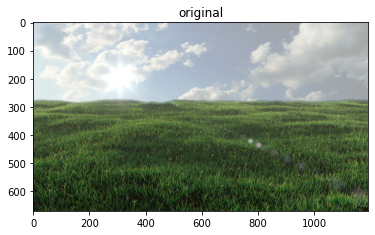

In [15]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));
plt.title('original');

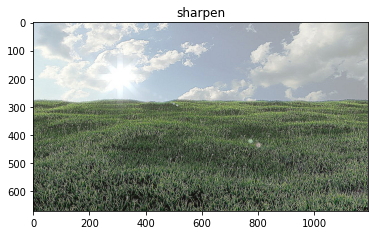

In [16]:
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB));
plt.title('sharpen');

Notice that some image features, such as edges, look sharper. Do you see any artefacts appearing as well? 

What happens if we apply this filter many times?

In [17]:
c = cv2.filter2D(b, -1, kernel)

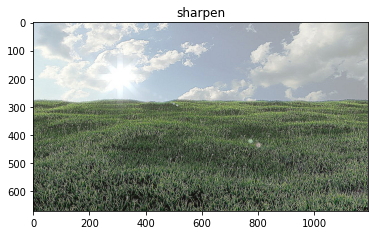

In [18]:
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB));
plt.title('sharpen');

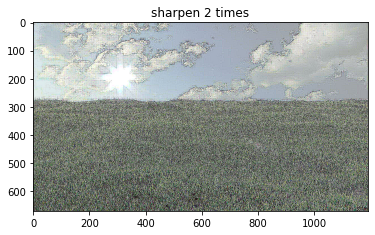

In [19]:
plt.imshow(cv2.cvtColor(c, cv2.COLOR_BGR2RGB));
plt.title('sharpen 2 times');

Let us rerun the script, but this time use the `car.png` image.

In [20]:
a = cv2.imread('Images/car.png')
b = cv2.filter2D(a, -1, kernel)

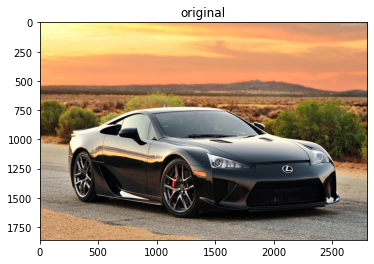

In [21]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));
plt.title('original');

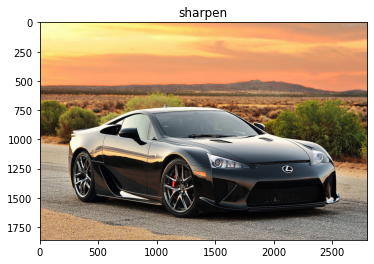

In [22]:
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB));
plt.title('sharpen');

Let us do the same with the `black.png` image.

In [23]:
a = cv2.imread('Images/black.png')
b = cv2.filter2D(a, -1, kernel)

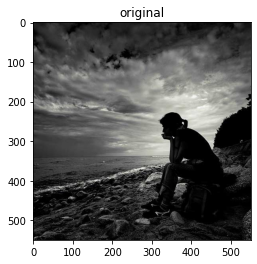

In [24]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));
plt.title('original');

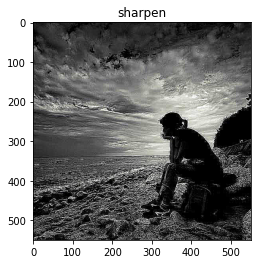

In [25]:
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB));
plt.title('sharpen');

### Disk Filter

The second filter to evaluate is the disk filter. It is used to blur images. In practice, it applies the circular averaging filter. Please take a look at an exemplary source code fetching an image and running the disk filter with two radii (1 and 10).

In [26]:
# Loading image and using radius filter
a = cv2.imread('Images/meadow.png')
radius = 1
a1 = skimage.morphology.disk(radius)
a1

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

In [27]:
np.sum(a1)

5

In [28]:
a1 = skimage.morphology.disk(radius) / np.sum(skimage.morphology.disk(radius))
a1

array([[0. , 0.2, 0. ],
       [0.2, 0.2, 0.2],
       [0. , 0.2, 0. ]])

In [29]:
np.sum(a1)

1.0

In [30]:
a2 = cv2.filter2D(a, -1, a1)

In [31]:
radius = 10
a10 = skimage.morphology.disk(radius)
a10

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [32]:
a10 = skimage.morphology.disk(radius) / np.sum(skimage.morphology.disk(radius))
a20 = cv2.filter2D(a, -1, a10)

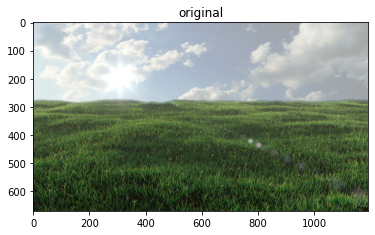

In [33]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));
plt.title('original');

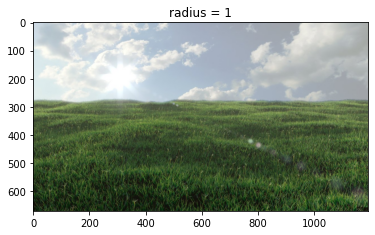

In [34]:
plt.imshow(cv2.cvtColor(a2, cv2.COLOR_BGR2RGB));
plt.title('radius = 1');

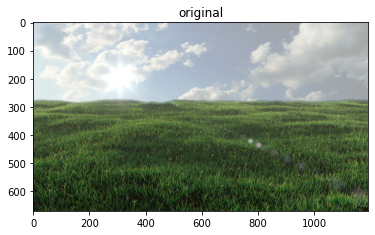

In [35]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));
plt.title('original');

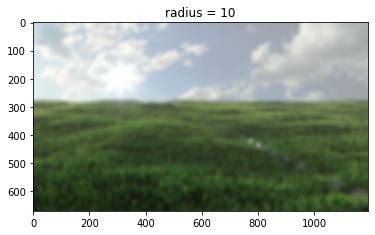

In [36]:
plt.imshow(cv2.cvtColor(a20, cv2.COLOR_BGR2RGB));
plt.title('radius = 10');

How does the radius of the filter influence the operation? Let us try to apply the filter with the smaller radius several times and compare it with a single run of the larger radius filter.

In [37]:
a2x10 = a
for i in range(10):
    a2x10 = cv2.filter2D(a2x10, -1, a1)

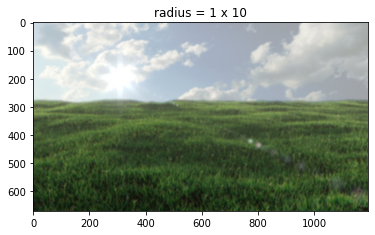

In [38]:
plt.imshow(cv2.cvtColor(a2x10, cv2.COLOR_BGR2RGB));
plt.title('radius = 1 x 10');

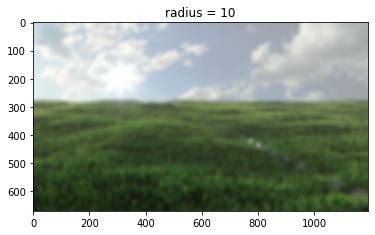

In [39]:
plt.imshow(cv2.cvtColor(a20, cv2.COLOR_BGR2RGB));
plt.title('radius = 10');

### Median Filter

The last test is the median filter. Recall that it is efficient in removing “salt-and-pepper” noise without significantly reducing the sharpness of the image. Please refer to an exemplary source code fetching an image, applying the “salt-and-pepper” noise to it and filtering it using the median filter.

In [40]:
# Loading image and using noise on image to show how filter works
a = cv2.imread('Images/meadow.png')
noise = skimage.util.random_noise(a, mode='s&p')

In [41]:
a.dtype

dtype('uint8')

In [42]:
noise.dtype

dtype('float64')

In [43]:
noise = skimage.img_as_ubyte(skimage.util.random_noise(a, mode='s&p'))
noise.dtype

dtype('uint8')

In [44]:
# We need to use filter for each channel separately
b = skimage.filters.rank.median(noise[:, :, 0])
g = skimage.filters.rank.median(noise[:, :, 1])
r = skimage.filters.rank.median(noise[:, :, 2])

In [49]:
# We need to reconstruct the image from separated channels
a1 = np.dstack((b, g, r))

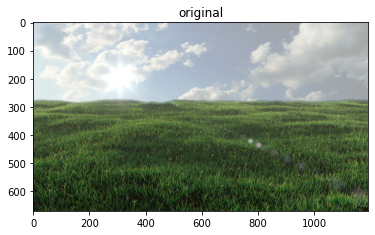

In [45]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));
plt.title('original');

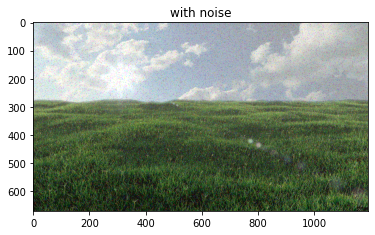

In [46]:
plt.imshow(cv2.cvtColor(noise, cv2.COLOR_BGR2RGB));
plt.title('with noise');

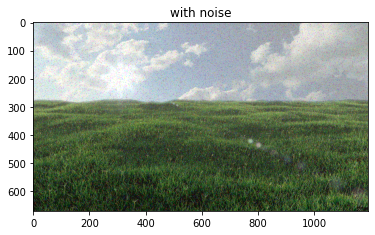

In [47]:
plt.imshow(cv2.cvtColor(noise, cv2.COLOR_BGR2RGB));
plt.title('with noise');

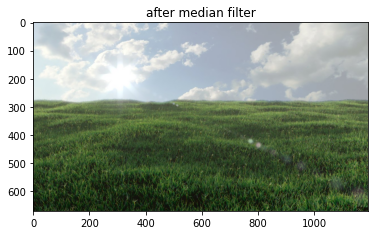

In [50]:
plt.imshow(cv2.cvtColor(a1, cv2.COLOR_BGR2RGB));
plt.title('after median filter');

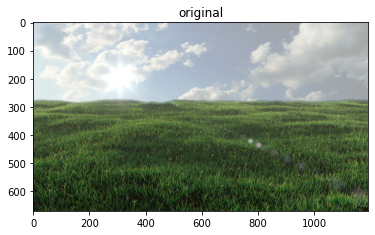

In [51]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));
plt.title('original');

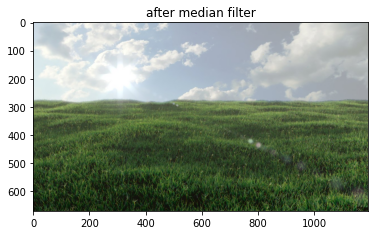

In [52]:
plt.imshow(cv2.cvtColor(a1, cv2.COLOR_BGR2RGB));
plt.title('after median filter');

Do you see how efficient this filter is in removing the “salt-and-pepper” noise? Are there any drawbacks related to this filtration?